In [8]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Impoting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [10]:
df = pd.read_csv('/content/drive/MyDrive/NLP Project/UCIdrug_train.csv')
test = pd.read_csv('/content/drive/MyDrive/NLP Project/UCIdrug_test.csv')

In [11]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [12]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [13]:
data = pd.concat([df,test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [14]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [16]:
data.isnull().sum()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

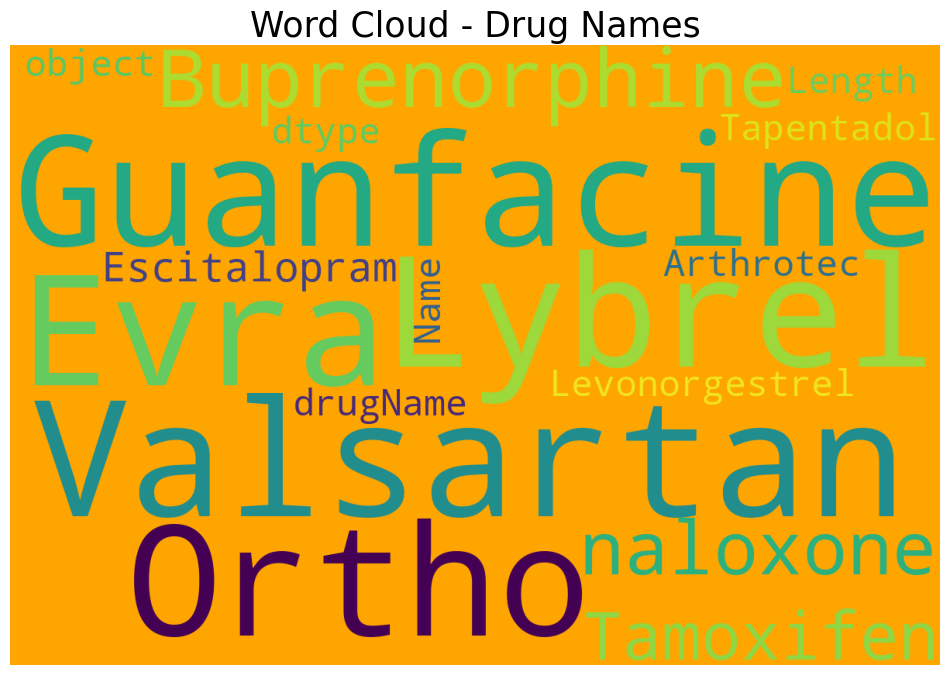

In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (12, 10)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

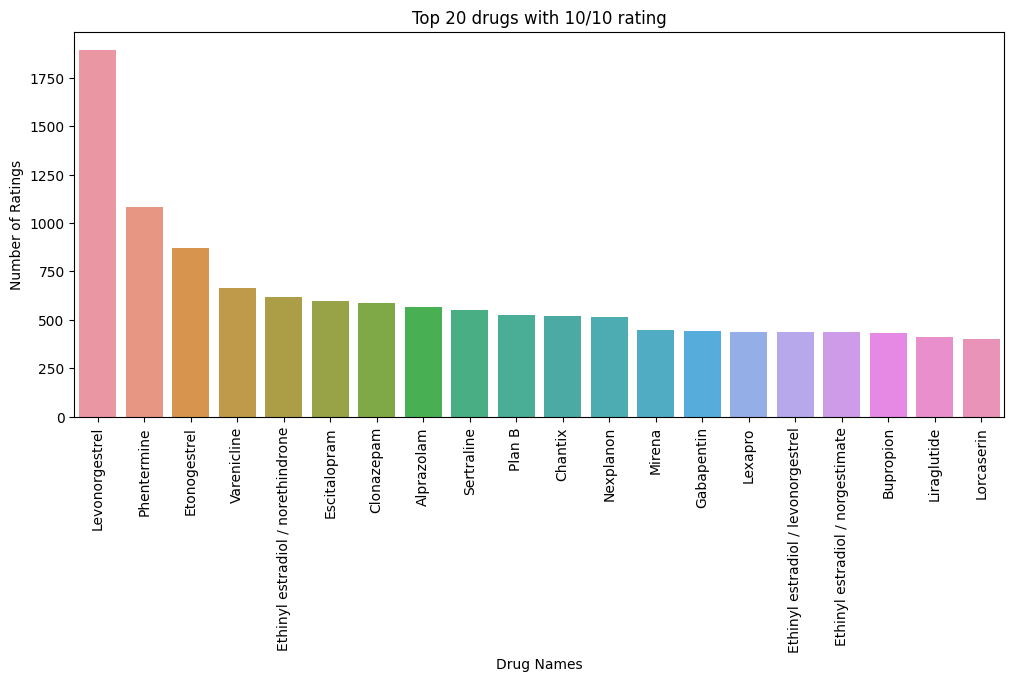

In [18]:
# This barplot shows the top 20 drugs with the 10/10 rating
plt.figure(figsize=(12,5))
rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

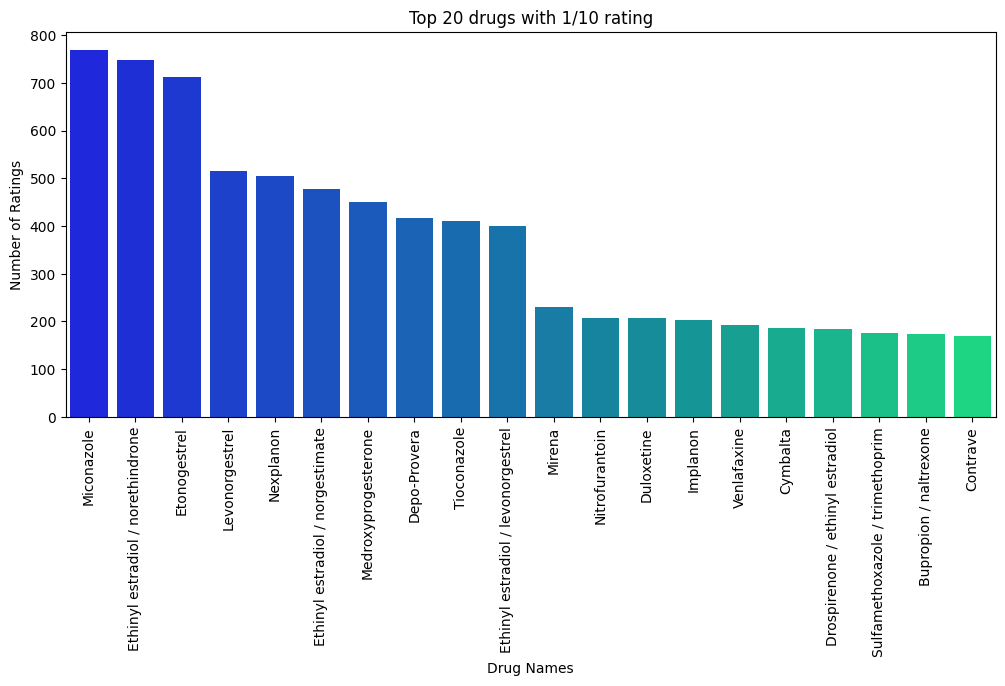

In [19]:
plt.figure(figsize=(12,5))
rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

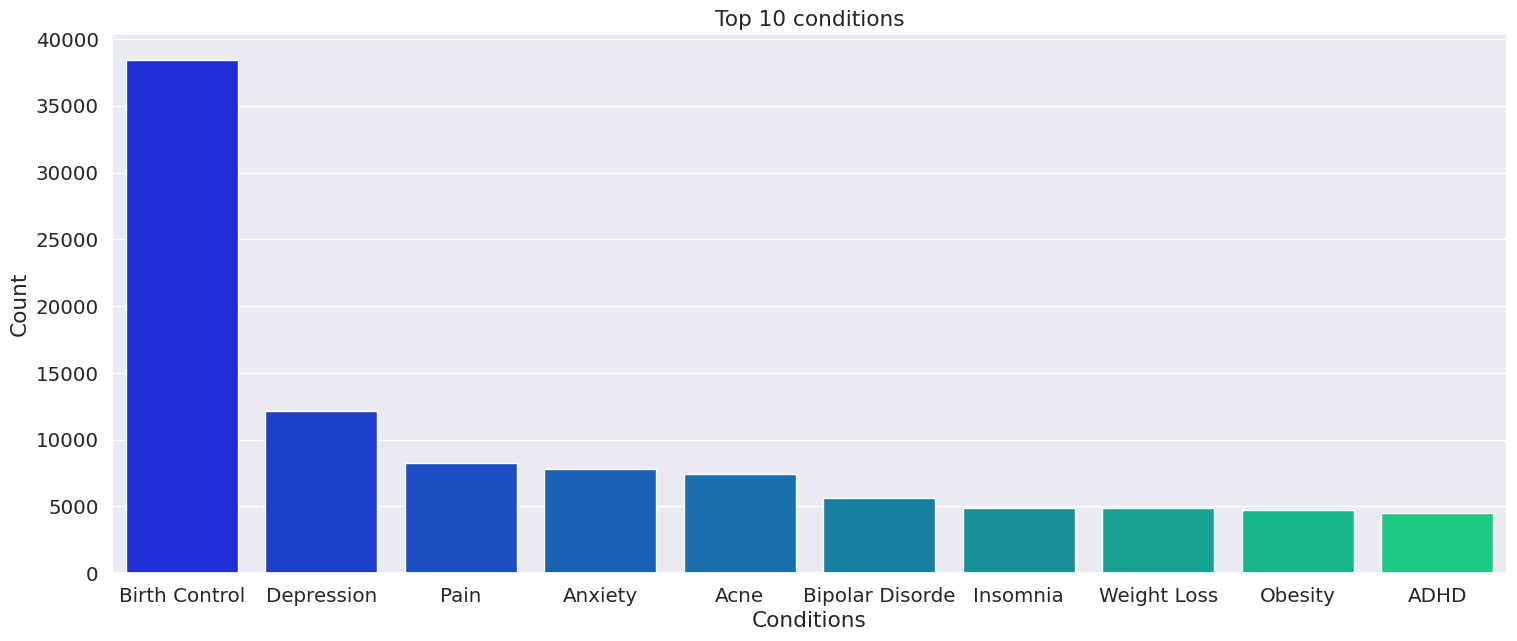

In [20]:
from threading import Condition
# This barplot show the top 10 conditions the people are suffering.
condition = dict(data['condition'].value_counts())
top_condition = list(condition.keys())[0:10]
values = list(condition.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

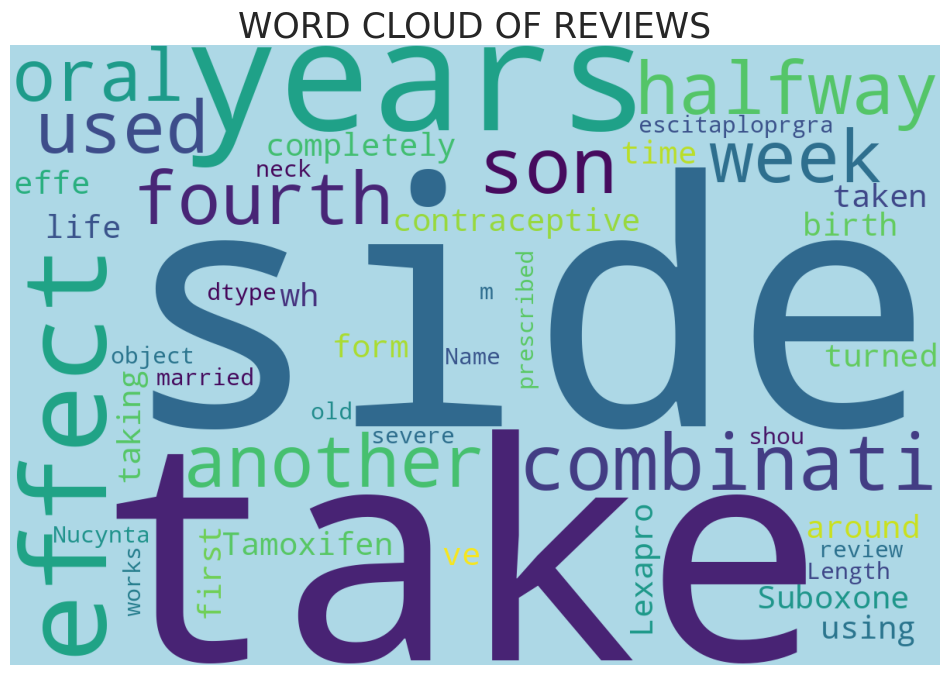

In [21]:
wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (12, 10)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [22]:
# Creating sentiments based on ratings
data.loc[(data['rating'] >= 7), 'Review_Sentiment'] = 'Positive'
data.loc[data['rating'].isin([5, 6]), 'Review_Sentiment'] = 'Neutral'
data.loc[(data['rating'] <= 4), 'Review_Sentiment'] = 'Negative'

data['Review_Sentiment'].value_counts()

Positive    142306
Negative     53572
Neutral      19185
Name: Review_Sentiment, dtype: int64

<Axes: xlabel='Review_Sentiment', ylabel='Count'>

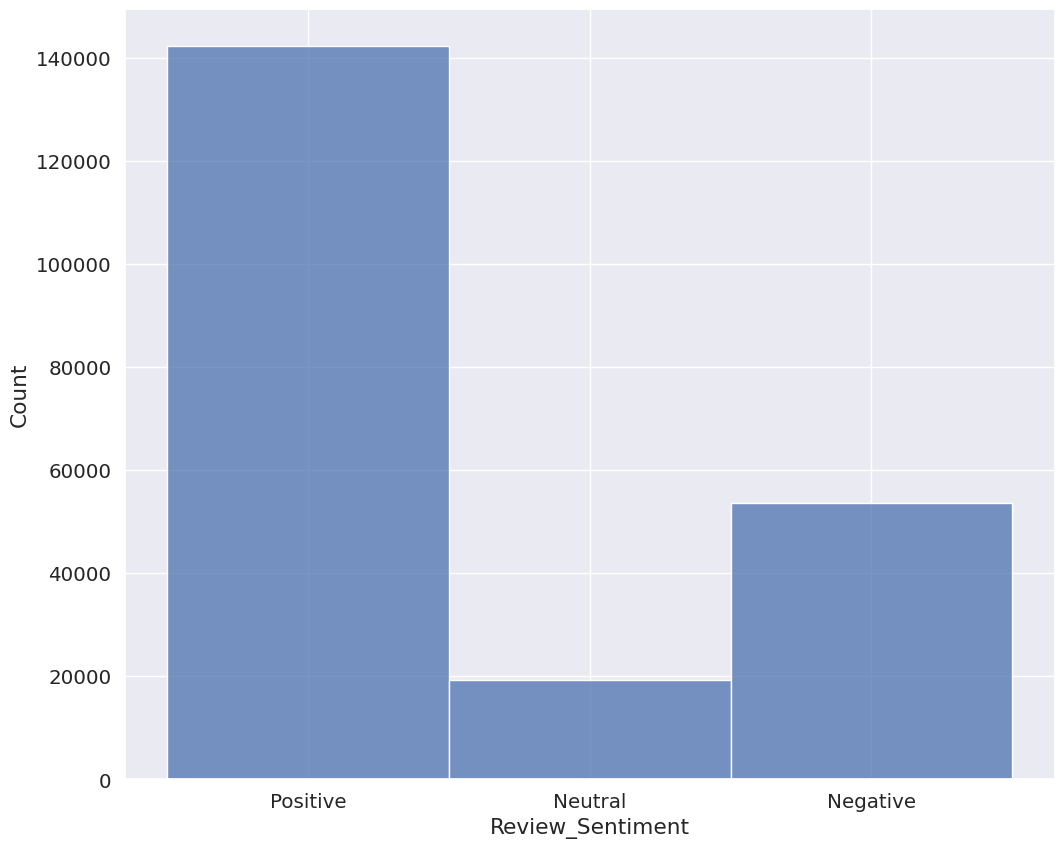

In [23]:
sns.histplot(data['Review_Sentiment'].astype(str))

In [24]:
import pandas as pd
from sklearn.utils import resample


data_majority_1 = data[data['Review_Sentiment'] == 'Positive']  # Majority class
data_majority_2 = data[data['Review_Sentiment'] == 'Negative']

# Downsample the majority class to match the size of the minority class
data_minority = data[data['Review_Sentiment'] == 'Neutral']  # Minority class

# Downsample the majority class to match the size of the minority class
data_majority_1_downsampled = resample(data_majority_1,
                                     replace=False,
                                     n_samples=len(data_minority),
                                     random_state=42)
data_majority_2_downsampled = resample(data_majority_2,
                                     replace=False,
                                     n_samples=len(data_minority),
                                     random_state=42)

# Combine the downsampled majority class and the minority class
data = pd.concat([data_majority_1_downsampled,data_majority_2_downsampled, data_minority])




In [25]:
len(data)

57555

In [26]:
import pandas as pd
from sklearn.utils import resample


data_majority_1 = data[data['Review_Sentiment'] == 'Positive']  # Majority class
data_majority_2 = data[data['Review_Sentiment'] == 'Negative']

# Downsample the majority class to match the size of the minority class
data_minority = data[data['Review_Sentiment'] == 'Neutral']  # Minority class

# Downsample the majority class to match the size of the minority class
data_majority_1_downsampled = resample(data_majority_1,
                                     replace=False,
                                     n_samples=2000,
                                     random_state=42)
data_majority_2_downsampled = resample(data_majority_2,
                                     replace=False,
                                     n_samples=2000,
                                     random_state=42)

data_minority_downsampled = resample(data_minority,
                                     replace=False,
                                     n_samples=2000,
                                     random_state=42)

# Combine the downsampled majority class and the minority class
data = pd.concat([data_majority_1_downsampled,data_majority_2_downsampled, data_minority_downsampled])



In [27]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [28]:
data['review_clean'] = review_clean(data['review'])

<ipython-input-27-a34c3dd820b2>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-27-a34c3dd820b2>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-27-a34c3dd820b2>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-27-a34c3dd820b2>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-27-a34c3dd820b2>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [29]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
nltk.download('stopwords')
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize


# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
from nltk.stem import SnowballStemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [31]:
data['Review_Sentiment'].value_counts()

Positive    2000
Negative    2000
Neutral     2000
Name: Review_Sentiment, dtype: int64

In [ ]:
# import torch
# from torch.utils.data import DataLoader, TensorDataset
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW
# import matplotlib.pyplot as plt

# # Load BioBERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('monologg/biobert_v1.1_pubmed', do_lower_case=True)
# model = BertForSequenceClassification.from_pretrained('monologg/biobert_v1.1_pubmed', num_labels=3)  # Assuming binary sentiment classification


# train_texts = data['review_clean'].tolist()
# train_labels = data['Review_Sentiment'].tolist()
# label_mapping = {'Negative': 0, 'Positive': 1, 'Neutral': 2}

# # Convert string labels to numerical labels
# train_labels_numeric = [label_mapping[label] for label in train_labels]

# # Tokenize and encode the dataset
# inputs = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt")
# labels = torch.tensor(train_labels_numeric)

# # Check lengths
# assert len(inputs['input_ids']) == len(inputs['attention_mask']) == len(labels), "Size mismatch between tensors"

# # Create a PyTorch DataLoader
# dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
# dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# # Fine-tune the model
# optimizer = AdamW(model.parameters(), lr=5e-5)
# num_epochs = 5

# # Lists to store results for plotting
# losses = []
# accuracies = []

# for epoch in range(num_epochs):
#     total_loss = 0.0
#     correct_predictions = 0
#     total_samples = 0

#     for batch in dataloader:
#         input_ids, attention_mask, labels = batch
#         outputs = model(input_ids, attention_mask=attention_mask)
#         logits = outputs.logits

#         labels = labels.long()

#         # Calculate the binary cross-entropy loss
#         loss = torch.nn.functional.cross_entropy(logits, labels)
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
#         optimizer.zero_grad()

#         # Update statistics
#         total_loss += loss.item()
#         _, predicted_labels = torch.max(logits, 1)
#         correct_predictions += (predicted_labels == labels).sum().item()
#         total_samples += labels.size(0)

#     # Calculate accuracy
#     accuracy = correct_predictions / total_samples

#     # Store results for plotting
#     losses.append(total_loss)
#     accuracies.append(accuracy)

#     # Print epoch statistics
#     print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}')
#     print('-' * 50)

# # Plot the results
# plt.figure(figsize=(12, 4))

# # Plot loss
# plt.subplot(1, 2, 1)
# plt.plot(losses, label='Training Loss', marker='o')
# plt.title('Training Loss over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# # Plot accuracy
# plt.subplot(1, 2, 2)
# plt.plot(accuracies, label='Training Accuracy', marker='o', color='orange')
# plt.title('Training Accuracy over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

# Load BioBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('monologg/biobert_v1.1_pubmed', do_lower_case=True)
model = BertForSequenceClassification.from_pretrained('monologg/biobert_v1.1_pubmed', num_labels=3)  # Assuming binary sentiment classification

train_texts = data['review_clean'].tolist()
train_labels = data['Review_Sentiment'].tolist()
label_mapping = {'Negative': 0, 'Positive': 1, 'Neutral': 2}

# Convert string labels to numerical labels
train_labels_numeric = [label_mapping[label] for label in train_labels]

# Tokenize and encode the dataset
inputs = tokenizer(train_texts, padding=True, truncation=True, return_tensors="pt")
labels = torch.tensor(train_labels_numeric)

# Check lengths
assert len(inputs['input_ids']) == len(inputs['attention_mask']) == len(labels), "Size mismatch between tensors"

# Create a PyTorch DataLoader
dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Fine-tune the model
optimizer = AdamW(model.parameters(), lr=5e-5)

# Learning rate scheduler
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)  # Adjust parameters as needed

num_epochs = 5

# Lists to store results for plotting
losses = []
accuracies = []

for epoch in range(num_epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        labels = labels.long()

        # Calculate the binary cross-entropy loss
        loss = torch.nn.functional.cross_entropy(logits, labels)
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        # Update statistics
        total_loss += loss.item()
        _, predicted_labels = torch.max(logits, 1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

    # Learning rate scheduler step
    scheduler.step()

    # Calculate accuracy
    accuracy = correct_predictions / total_samples

    # Store results for plotting
    losses.append(total_loss)
    accuracies.append(accuracy)

    # Print epoch statistics
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}, Learning Rate: {scheduler.get_last_lr()[0]}')
    print('-' * 50)

print('Finished training!')

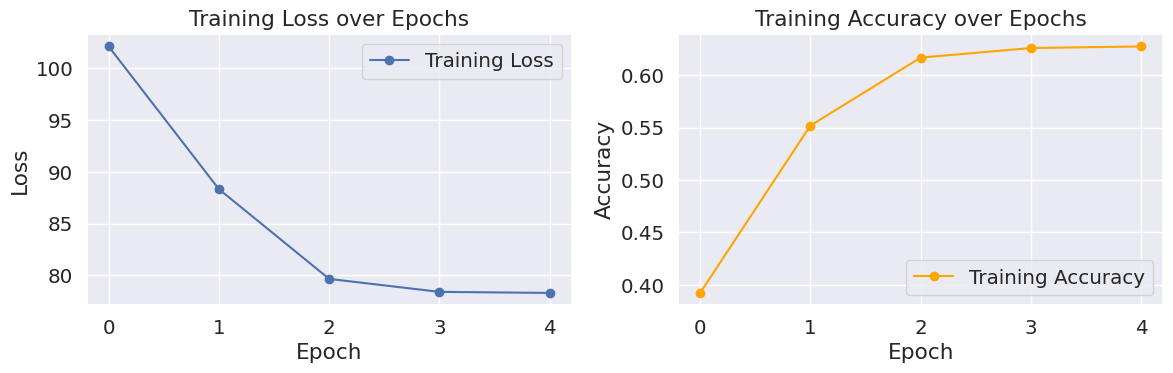

In [72]:
# Plot the results
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss', marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Training Accuracy', marker='o', color='orange')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
import torch



# Save the entire model (including architecture and parameters)
torch.save(model, '/content/drive/MyDrive/NLP Project/modelbiob2.pth')



In [34]:
test = pd.read_csv('/content/drive/MyDrive/NLP Project/UCIdrug_test.csv')

In [35]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [36]:
test.loc[test['rating'] >= 7, 'Review_Sentiment'] = 'Positive'
test.loc[test['rating'].isin([5, 6]), 'Review_Sentiment'] = 'Neutral'
test.loc[test['rating'] <= 4, 'Review_Sentiment'] = 'Negative'
test['Review_Sentiment'] = test['Review_Sentiment'].replace({'Positive': 1, 'Neutral': 2, 'Negative': 0})


In [37]:
test[:10]

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,1
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17,1
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3,1
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,1
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4,1
5,208087,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13,0
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,6-Jun-16,1,2
7,169852,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,21-Apr-09,32,1
8,23295,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21,1
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,16-Apr-11,3,0


In [38]:
test = test[:10]
test['Review_Sentiment'].value_counts()

1    7
0    2
2    1
Name: Review_Sentiment, dtype: int64

In [39]:
test['review_clean'] = review_clean(test['review'])

In [40]:
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [41]:
from sklearn import metrics

In [42]:


# Load the saved model
model = torch.load('/content/drive/MyDrive/NLP Project/modelbiob2.pth')


# Tokenize and encode the test data
inputs = tokenizer(test['review_clean'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Create a PyTorch DataLoader for the test data
test_dataloader = DataLoader(inputs, batch_size=64, shuffle=False)

# Make predictions on the test data
with torch.no_grad():
    predictions = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    predictions = predictions.logits
    predictions = torch.nn.functional.softmax(predictions, dim=1)
    predicted_labels = torch.argmax(predictions, dim=1)

# Convert predicted labels to strings
predicted_labels = predicted_labels.cpu().numpy()


In [43]:
precision = metrics.precision_score(test['Review_Sentiment'], predicted_labels, average='macro')
recall = metrics.recall_score(test['Review_Sentiment'], predicted_labels, average='macro')

In [44]:
f1 = 2 * (precision * recall) / (precision + recall)
print("F1_score is",round(f1,2))

F1_score is 0.84


In [71]:
accuracy = metrics.accuracy_score(test['Review_Sentiment'], predicted_labels)
print("Accuracy is",round(accuracy,2))

Accuracy is 0.8


Testing the Model

In [62]:
inputs = tokenizer(test['review_clean'][1], padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    predictions = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    predictions = predictions.logits
    predictions = torch.nn.functional.softmax(predictions, dim=1)
    predicted_label = torch.argmax(predictions, dim=1)
predicted_label = predicted_label.cpu().numpy()
if predicted_label == 0:
    print("Negative")
elif predicted_label == 1:
    print("Positive")
else:
    print("Neutral")


Positive


In [68]:
inputs = tokenizer(test['review_clean'][5], padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    predictions = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    predictions = predictions.logits
    predictions = torch.nn.functional.softmax(predictions, dim=1)
    predicted_label = torch.argmax(predictions, dim=1)
predicted_label = predicted_label.cpu().numpy()
if predicted_label == 0:
    print("Negative")
elif predicted_label == 1:
    print("Positive")
else:
    print("Neutral")


Negative


In [60]:
inputs = tokenizer(test['review_clean'][6], padding=True, truncation=True, return_tensors="pt")
with torch.no_grad():
    predictions = model(inputs['input_ids'], attention_mask=inputs['attention_mask'])
    predictions = predictions.logits
    predictions = torch.nn.functional.softmax(predictions, dim=1)
    predicted_label = torch.argmax(predictions, dim=1)
predicted_label = predicted_label.cpu().numpy()
if predicted_label == 0:
    print("Negative")
elif predicted_label == 1:
    print("Positive")
else:
    print("Neutral")

Neutral
